# Import the Labraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
csvpath = ("../csv/Salary_Data.csv")

In [3]:
dataset = pd.read_csv(csvpath)

In [4]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
dataset.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

Outliers

<Axes: >

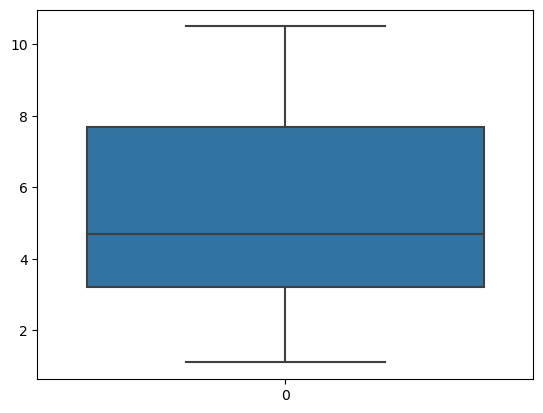

In [6]:
sns.boxplot(dataset["YearsExperience"])

<Axes: >

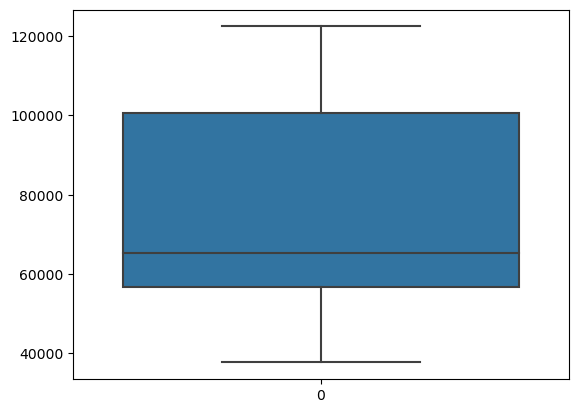

In [7]:
sns.boxplot(dataset["Salary"])

In [8]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Split data into Dependent and Independent variables

In [9]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
x = dataset[["YearsExperience"]]

In [11]:
x.ndim

2

In [12]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [13]:
y = dataset["Salary"]

In [14]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

Split data into train and test 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

Analyze

In [17]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<Axes: xlabel='YearsExperience', ylabel='Salary'>

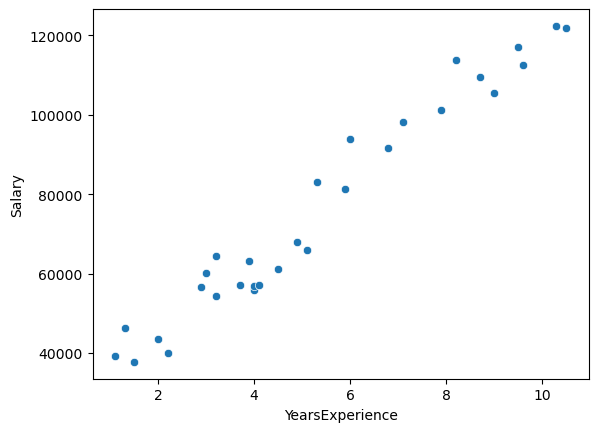

In [18]:
sns.scatterplot(x = dataset["YearsExperience"], y = dataset["Salary"])

Build Simple Lilnear Regression model

In [19]:
#import the model class
from sklearn.linear_model import LinearRegression

In [20]:
# init the model
#creating the constructor
lr_model = LinearRegression()

In [21]:
#train the model
#fit -- train the model
lr_model.fit(x_train, y_train)

LinearRegression()

In [22]:
 lr_model.coef_  #slope, m

array([9332.94473799])

In [23]:
 lr_model.intercept_  #c

25609.89799835482

In [24]:
#lr_model -- trained model

Test the model --prediction

In [25]:
#prediction -- prediction -- testing
y_pred = lr_model.predict(x_test)

In [26]:
x_test

,YearsExperience
17,5.3
21,7.1
10,3.9
19,6.0
14,4.5
20,6.8


In [27]:
y_pred

array([75074.50510972, 91873.8056381 , 62008.38247653, 81607.56642631,
       67608.14931932, 89073.92221671])

In [28]:
 y_test

17    83088.0
21    98273.0
10    63218.0
19    93940.0
14    61111.0
20    91738.0
Name: Salary, dtype: float64

In [29]:
# My exp is 4 yrs, I am expecting a salary of 3L -- How many years I need to Work

In [30]:
#25 years

Plot Best fit Line 

In [31]:
import matplotlib.pyplot as plt

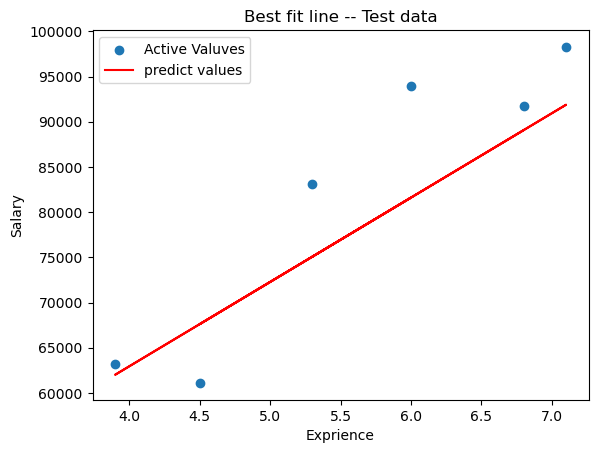

In [32]:
plt.scatter(x_test, y_test, label = "Active Valuves")
plt.plot(x_test, y_pred, label = "predict values", color = "red")

plt.legend()
plt.title("Best fit line -- Test data")
plt.xlabel("Exprience")
plt.ylabel("Salary")
plt.show()


Train Data Plot

In [33]:
y_pred_train = lr_model.predict(x_train)

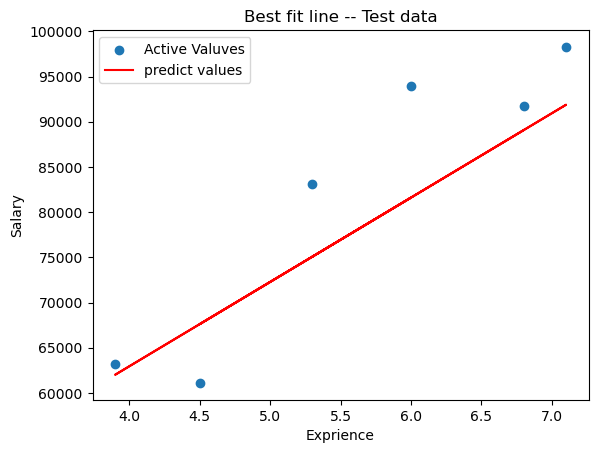

In [34]:
plt.scatter(x_test, y_test, label = "Active Valuves")
plt.plot(x_test, y_pred, label = "predict values", color = "red")

plt.legend()
plt.title("Best fit line -- Test data")
plt.xlabel("Exprience")
plt.ylabel("Salary")
plt.show()


Evaluate the model performance

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [36]:
mse = mean_squared_error(y_test, y_pred)

In [37]:
mse #square deviation

51338023.49224842

In [38]:
rmse = np.sqrt(mse)

In [39]:
rmse

7165.055721503387

In [40]:
# On average there is a deviation of approx 3000 b/w actual salary and predicted salary

r2_score

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_test = r2_score(y_test, y_pred)

In [43]:
r2_test

0.7616681465472094

MSE Score

In [44]:
mae = mean_absolute_error(y_test, y_pred)

In [45]:
mae

6185.994575326634

Real Time Prediction

In [80]:
exp = [5]

In [81]:
exp = np.array(exp)

In [82]:
exp.shape

(1,)

In [87]:
exp.reshape(-1, 1)

array([[5]])

In [88]:
exp.shape

(1, 1, 1)

In [1]:
exp = np.array([[exp]])

NameError: name 'np' is not defined

In [ ]:
exp

In [91]:
lr_model.predict(exp)

C:\Users\sandh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Found array with dim 5. LinearRegression expected <= 2.

save the model

In [94]:
lr_model

LinearRegression()

In [92]:
import joblib

In [95]:
#model -- Oblect
#file name
joblib.dump(lr_model, "salary_prediction.plk")

['salary_prediction.plk']